In [1]:
fn = 'insect_pfam.txt'

In [2]:
sum(1 for line in open(fn))

929053

In [3]:
for i, line in enumerate(open(fn)):
    print (i, line)
    if i > 100:
        break

(0, 'Archaeognatha\t[Petrobius brevistylis]\tPF00115.17(COX1) \t3\n')
(1, 'Archaeognatha\t[Pedetontus unimaculatus]\tPF00046.26(Homeobox) PF10525.6(Engrail_1_C_sig) \t2\n')
(2, 'Archaeognatha\t[Archaeognatha sp. NZAC 03013586]\tPF00115.17(COX1) \t1\n')
(3, 'Archaeognatha\t[Pedetontus submutans]\tPF00115.17(COX1) \t16\n')
(4, 'Archaeognatha\t[Petridiobius sp. BOLD:AAV1529]\tPF00115.17(COX1) \t4\n')
(5, 'Archaeognatha\t[Machilidae sp. BOLD:ACJ4257]\tPF00115.17(COX1) \t1\n')
(6, 'Archaeognatha\t[Machilidae sp. BOLD:AAV1530]\tPF00115.17(COX1) \t1\n')
(7, 'Archaeognatha\t[Pedetontus sp. BOLD:AAV1531]\tPF00115.17(COX1) \t9\n')
(8, 'Archaeognatha\t[Machilidae sp. BOLD:ACJ3418]\tPF00115.17(COX1) \t1\n')
(9, 'Archaeognatha\t[Pedetontus saltator]\tPF00115.17(COX1) \t1\n')
(10, 'Archaeognatha\t[Haslundichilis viridis]\tPF00135.25(COesterase) PF07859.10(Abhydrolase_3) \t2\n')
(11, 'Archaeognatha\t[Mesomachilis cf. nearcticus LB-2010]\tPF02790.12(COX2_TM) \t4\n')
(12, 'Archaeognatha\t[Mesomachilis 

In [4]:
cnt_insect_prot = {}
for i, line in enumerate(open(fn)):
    insect_ord, insect_spe, pfams, cnt = line.strip().split('\t')
    if not cnt_insect_prot.has_key(insect_ord):
        cnt_insect_prot.update({insect_ord:0})
    cnt_insect_prot[insect_ord] += int(cnt)
    if i > 100:
        break

In [5]:
cnt_insect_prot

{'Archaeognatha': 671}

In [6]:
cnt_insect_prot = {}
for i, line in enumerate(open(fn)):
    insect_ord, insect_spe, pfams, cnt = line.strip().split('\t')
    if not cnt_insect_prot.has_key(insect_ord):
        cnt_insect_prot.update({insect_ord:0})
    cnt_insect_prot[insect_ord] += int(cnt)

In [7]:
cnt_insect_prot

{'Archaeognatha': 1061,
 'Blattodea': 2810,
 'Coleoptera': 250150,
 'Collembola': 18481,
 'Dermaptera': 395,
 'Diplura': 337,
 'Diptera': 1376752,
 'Embioptera': 237,
 'Ephemeroptera': 11486,
 'Grylloblattodea': 754,
 'Hemiptera': 282133,
 'Hymenoptera': 958997,
 'Lepidoptera': 642231,
 'Mantodea': 2819,
 'Mantophasmatodea': 136,
 'Mecoptera': 778,
 'Megaloptera': 995,
 'Neuroptera': 3306,
 'Odonata': 10211,
 'Orthoptera': 21771,
 'Phasmatodea': 4389,
 'Plecoptera': 5230,
 'Protura': 143,
 'Psocodea': 4173,
 'Raphidioptera': 152,
 'Siphonaptera': 2834,
 'Strepsiptera': 610,
 'Thysanoptera': 8398,
 'Thysanura': 343,
 'Trichoptera': 25040,
 'Zoraptera': 31}

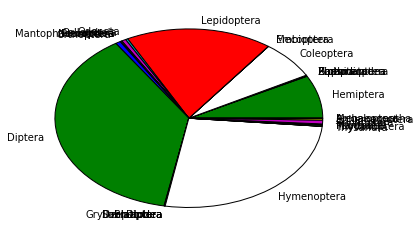

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
labels = cnt_insect_prot.keys()
sizes = cnt_insect_prot.values()
plt.pie(sizes, labels=labels)
plt.show()

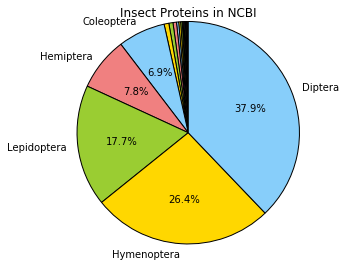

In [9]:
import numpy as np
total = np.sum(cnt_insect_prot.values())
labels = []
sizes = []
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral'] * (len(cnt_insect_prot) / 4)
for k, v in sorted(cnt_insect_prot.items(), key=lambda x:x[1]):
    sizes.append(v)
    if v < (total * 0.01):
        labels.append('')
    else:
        labels.append(k)

plt.pie(sizes, labels=labels, colors=colors, 
        #autopct='%1.1f%%', 
        autopct=lambda p: '{:.1f}%'.format(p) if p >= 1 else '',
        #counterclock=False,
        shadow=False, startangle=90)
plt.axis('equal')
plt.title('Insect Proteins in NCBI')
plt.show()

In [10]:
import locale
def draw_pie_chart(title, dictionary):
    locale.setlocale(locale.LC_NUMERIC,'ja_JP')
    total = np.sum(dictionary.values())
    labels = []
    sizes = []
    colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral'] * (len(dictionary) / 4)
    for k, v in sorted(dictionary.items(), key=lambda x:x[1]):
        sizes.append(v)
        if v < (total * 0.02):
            labels.append('')
        else:
            label = "{0}, {1}".format(k, locale.format('%d', v, True))
            labels.append(label)
    plt.pie(sizes, labels=labels, colors=colors, 
            #autopct='%1.1f%%', 
            autopct=lambda p: '{:.1f}%'.format(p) if p >= 2 else '',
            #counterclock=False,
            shadow=False, startangle=90)
    plt.axis('equal')
    plt.title(title)
    plt.show()

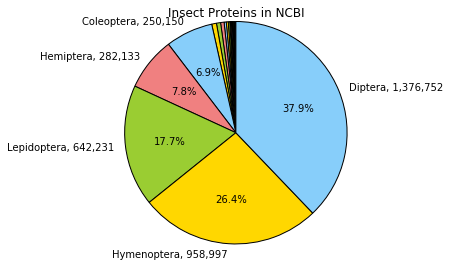

In [11]:
draw_pie_chart("Insect Proteins in NCBI", cnt_insect_prot)

In [12]:
lst_insect_spe = {}
for i, line in enumerate(open(fn)):
    insect_ord, insect_spe, pfams, cnt = line.strip().split('\t')
    if not lst_insect_spe.has_key(insect_ord):
        lst_insect_spe.update({insect_ord:[]})
    if insect_spe not in lst_insect_spe[insect_ord]:
        lst_insect_spe[insect_ord].append(insect_spe)
    if i > 100:
        break

In [13]:
lst_insect_spe

{'Archaeognatha': ['[Petrobius brevistylis]',
  '[Pedetontus unimaculatus]',
  '[Archaeognatha sp. NZAC 03013586]',
  '[Pedetontus submutans]',
  '[Petridiobius sp. BOLD:AAV1529]',
  '[Machilidae sp. BOLD:ACJ4257]',
  '[Machilidae sp. BOLD:AAV1530]',
  '[Pedetontus sp. BOLD:AAV1531]',
  '[Machilidae sp. BOLD:ACJ3418]',
  '[Pedetontus saltator]',
  '[Haslundichilis viridis]',
  '[Mesomachilis cf. nearcticus LB-2010]',
  '[Mesomachilis nearcticus]',
  '[Lepismachilis y-signata]',
  '[Machilis helleri]',
  '[Machilis tirolensis]',
  '[Machilis ticinensis]',
  '[Machilis sp. A TD-2014]',
  '[Machilis pallida]',
  '[Machilis mesolcinensis]',
  '[Machilis lehnhoferi]',
  '[Machilis cf. vallicola TD-2014]',
  '[Machilis cf. ladensis TD-2014]',
  '[Machilis inermis]',
  '[Machilis hrabei]',
  '[Machilis glacialis]',
  '[Machilis fuscistylis]',
  '[Machilis engiadina]',
  '[Machilis rubrofusca]',
  '[Petrobiellus sp. 2 JZ-2014]',
  '[Petrobiellus sp. 1 JZ-2014]',
  '[Pedetontinus luanchuanensis

In [14]:
lst_insect_spe = {}
for i, line in enumerate(open(fn)):
    insect_ord, insect_spe, pfams, cnt = line.strip().split('\t')
    if not lst_insect_spe.has_key(insect_ord):
        lst_insect_spe.update({insect_ord:[]})
    if insect_spe not in lst_insect_spe[insect_ord]:
        lst_insect_spe[insect_ord].append(insect_spe)

In [15]:
cnt_insect_spe = {}
for k in lst_insect_spe:
    print (k, len(lst_insect_spe[k]))
    cnt_insect_spe.update({k: len(lst_insect_spe[k])})

('Archaeognatha', 75)
('Hemiptera', 9953)
('Siphonaptera', 258)
('Phasmatodea', 329)
('Protura', 35)
('Raphidioptera', 55)
('Zoraptera', 3)
('Coleoptera', 26693)
('Embioptera', 86)
('Mecoptera', 142)
('Lepidoptera', 51838)
('Odonata', 1498)
('Collembola', 1529)
('Neuroptera', 572)
('Mantophasmatodea', 18)
('Plecoptera', 644)
('Orthoptera', 2432)
('Diptera', 27889)
('Blattodea', 572)
('Dermaptera', 51)
('Diplura', 24)
('Strepsiptera', 151)
('Grylloblattodea', 59)
('Hymenoptera', 28552)
('Thysanura', 33)
('Thysanoptera', 566)
('Mantodea', 415)
('Psocodea', 449)
('Trichoptera', 2404)
('Ephemeroptera', 1255)
('Megaloptera', 106)


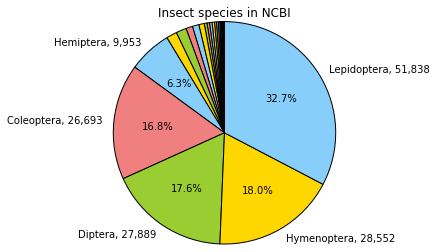

In [16]:
draw_pie_chart("Insect species in NCBI", cnt_insect_spe)

In [17]:
lst_insect_genus = {}
for i, line in enumerate(open(fn)):
    insect_ord, insect_spe, pfams, cnt = line.strip().split('\t')
    insect_genus = insect_spe.split()[0]
    if not lst_insect_genus.has_key(insect_ord):
        lst_insect_genus.update({insect_ord:[]})
    if insect_genus not in lst_insect_genus[insect_ord]:
        lst_insect_genus[insect_ord].append(insect_genus)
cnt_insect_genus = {}
for k in lst_insect_genus:
    print (k, len(lst_insect_genus[k]))
    cnt_insect_genus.update({k: len(lst_insect_genus[k])})

('Archaeognatha', 20)
('Hemiptera', 2671)
('Siphonaptera', 119)
('Phasmatodea', 154)
('Protura', 20)
('Raphidioptera', 26)
('Zoraptera', 1)
('Coleoptera', 5463)
('Embioptera', 32)
('Mecoptera', 20)
('Lepidoptera', 7263)
('Odonata', 366)
('Collembola', 139)
('Neuroptera', 152)
('Mantophasmatodea', 10)
('Plecoptera', 199)
('Orthoptera', 796)
('Diptera', 2612)
('Blattodea', 149)
('Dermaptera', 29)
('Diplura', 14)
('Strepsiptera', 24)
('Grylloblattodea', 4)
('Hymenoptera', 2685)
('Thysanura', 14)
('Thysanoptera', 135)
('Mantodea', 198)
('Psocodea', 135)
('Trichoptera', 350)
('Ephemeroptera', 215)
('Megaloptera', 21)


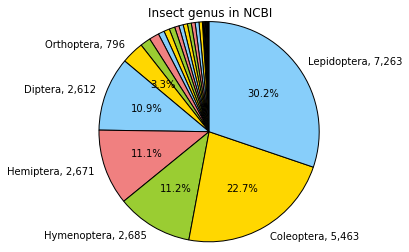

In [18]:
draw_pie_chart("Insect genus in NCBI", cnt_insect_genus)

In [19]:
pfamd = {}
for i, line in enumerate(open(fn)):
    insect_order, insect_spe, pfams, cnt = line.strip().split('\t')
    if not pfamd.has_key(insect_order):
        pfamd.update({insect_order:{}})
    if pfams not in pfamd[insect_order]:
        pfamd[insect_order].update({pfams:0})
    pfamd[insect_order][pfams] += int(cnt)
    if i > 1000:
        break
pfamd

{'Archaeognatha': {'-': 2,
  'PF00004.26(AAA) ': 1,
  'PF00006.22(ATP-synt_ab) ': 2,
  'PF00009.24(GTP_EFTU) ': 1,
  'PF00009.24(GTP_EFTU) PF03143.14(GTP_EFTU_D3) PF03144.22(GTP_EFTU_D2) ': 2,
  'PF00009.24(GTP_EFTU) PF03764.15(EFG_IV) PF14492.3(EFG_II) PF03144.22(GTP_EFTU_D2) ': 1,
  'PF00009.24(GTP_EFTU) PF14492.3(EFG_II) PF03144.22(GTP_EFTU_D2) PF03764.15(EFG_IV) ': 1,
  'PF00027.26(cNMP_binding) ': 1,
  'PF00033.16(Cytochrome_B) PF13631.3(Cytochrom_B_N_2) PF00032.14(Cytochrom_B_C) ': 15,
  'PF00046.26(Homeobox) ': 1,
  'PF00046.26(Homeobox) PF00412.19(LIM) ': 1,
  'PF00046.26(Homeobox) PF10525.6(Engrail_1_C_sig) ': 2,
  'PF00063.18(Myosin_head) ': 2,
  'PF00069.22(Pkinase) PF07714.14(Pkinase_Tyr) ': 4,
  'PF00069.22(Pkinase) PF07714.14(Pkinase_Tyr) PF01636.20(APH) ': 2,
  'PF00082.19(Peptidase_S8) ': 2,
  'PF00110.16(wnt) ': 1,
  'PF00115.17(COX1) ': 699,
  'PF00116.17(COX2) PF02790.12(COX2_TM) ': 15,
  'PF00119.17(ATP-synt_A) ': 15,
  'PF00121.15(TIM) ': 2,
  'PF00125.21(Histone) 

In [20]:
pfamd = {}
for i, line in enumerate(open(fn)):
    insect_order, insect_spe, pfams, cnt = line.strip().split('\t')
    if not pfamd.has_key(pfams):
        pfamd.update({pfams:0})
    pfamd[pfams] += int(cnt)

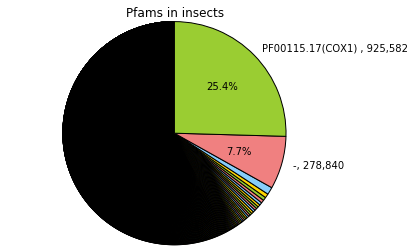

In [21]:
draw_pie_chart("Pfams in insects", pfamd)

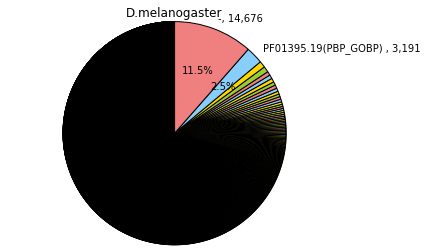

In [22]:
pfamd = {}
for i, line in enumerate(open(fn)):
    insect_order, insect_spe, pfams, cnt = line.strip().split('\t')
    if insect_spe != '[Drosophila melanogaster]':
        continue
    if not pfamd.has_key(pfams):
        pfamd.update({pfams:0})
    pfamd[pfams] += int(cnt)
draw_pie_chart("D.melanogaster", pfamd)

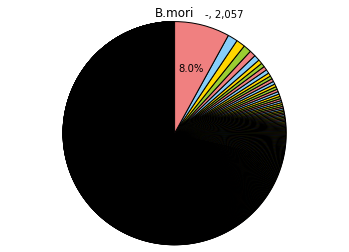

In [23]:
pfamd = {}
for i, line in enumerate(open(fn)):
    insect_order, insect_spe, pfams, cnt = line.strip().split('\t')
    if insect_spe != '[Bombyx mori]':
        continue
    if not pfamd.has_key(pfams):
        pfamd.update({pfams:0})
    pfamd[pfams] += int(cnt)
draw_pie_chart("B.mori", pfamd)

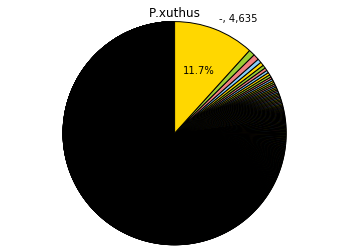

In [24]:
pfamd = {}
for i, line in enumerate(open(fn)):
    insect_order, insect_spe, pfams, cnt = line.strip().split('\t')
    if insect_spe != '[Papilio xuthus]':
        continue
    if not pfamd.has_key(pfams):
        pfamd.update({pfams:0})
    pfamd[pfams] += int(cnt)
draw_pie_chart("P.xuthus", pfamd)

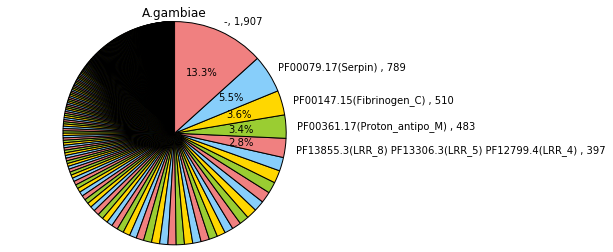

In [25]:
pfamd = {}
for i, line in enumerate(open(fn)):
    insect_order, insect_spe, pfams, cnt = line.strip().split('\t')
    if insect_spe != '[Anopheles gambiae]':
        continue
    if not pfamd.has_key(pfams):
        pfamd.update({pfams:0})
    pfamd[pfams] += int(cnt)
draw_pie_chart("A.gambiae", pfamd)

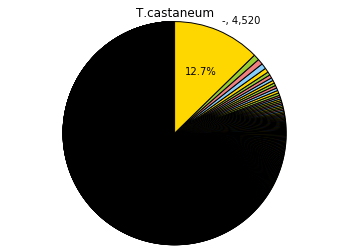

In [26]:
pfamd = {}
for i, line in enumerate(open(fn)):
    insect_order, insect_spe, pfams, cnt = line.strip().split('\t')
    if insect_spe != '[Tribolium castaneum]':
        continue
    if not pfamd.has_key(pfams):
        pfamd.update({pfams:0})
    pfamd[pfams] += int(cnt)
draw_pie_chart("T.castaneum", pfamd)

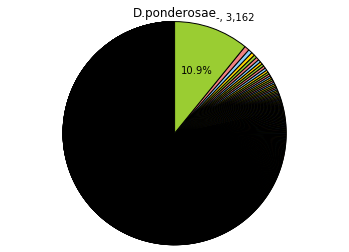

In [27]:
pfamd = {}
for i, line in enumerate(open(fn)):
    insect_order, insect_spe, pfams, cnt = line.strip().split('\t')
    if insect_spe != '[Dendroctonus ponderosae]':
        continue
    if not pfamd.has_key(pfams):
        pfamd.update({pfams:0})
    pfamd[pfams] += int(cnt)
draw_pie_chart("D.ponderosae", pfamd)

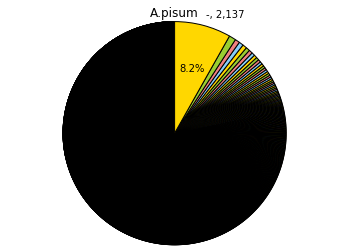

In [28]:
pfamd = {}
for i, line in enumerate(open(fn)):
    insect_order, insect_spe, pfams, cnt = line.strip().split('\t')
    if insect_spe != '[Acyrthosiphon pisum]':
        continue
    if not pfamd.has_key(pfams):
        pfamd.update({pfams:0})
    pfamd[pfams] += int(cnt)
draw_pie_chart("A.pisum", pfamd)

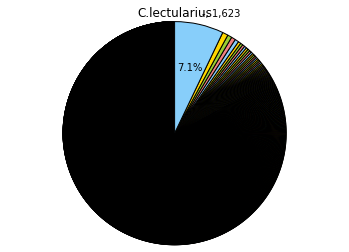

In [29]:
pfamd = {}
for i, line in enumerate(open(fn)):
    insect_order, insect_spe, pfams, cnt = line.strip().split('\t')
    if insect_spe != '[Cimex lectularius]':
        continue
    if not pfamd.has_key(pfams):
        pfamd.update({pfams:0})
    pfamd[pfams] += int(cnt)
draw_pie_chart("C.lectularius", pfamd)

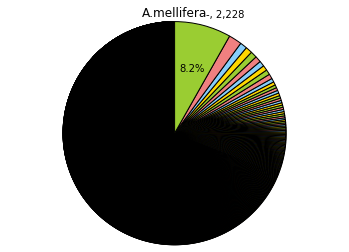

In [30]:
pfamd = {}
for i, line in enumerate(open(fn)):
    insect_order, insect_spe, pfams, cnt = line.strip().split('\t')
    if insect_spe != '[Apis mellifera]':
        continue
    if not pfamd.has_key(pfams):
        pfamd.update({pfams:0})
    pfamd[pfams] += int(cnt)
draw_pie_chart("A.mellifera", pfamd)

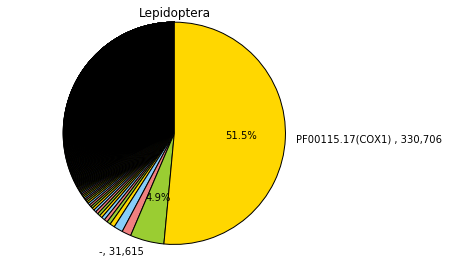

In [31]:
pfamd = {}
for i, line in enumerate(open(fn)):
    insect_order, insect_spe, pfams, cnt = line.strip().split('\t')
    if insect_order != 'Lepidoptera':
        continue
    if not pfamd.has_key(pfams):
        pfamd.update({pfams:0})
    pfamd[pfams] += int(cnt)
draw_pie_chart("Lepidoptera", pfamd)

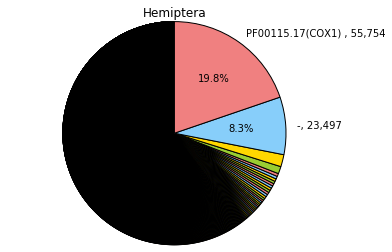

In [32]:
pfamd = {}
for i, line in enumerate(open(fn)):
    insect_order, insect_spe, pfams, cnt = line.strip().split('\t')
    if insect_order != 'Hemiptera':
        continue
    if not pfamd.has_key(pfams):
        pfamd.update({pfams:0})
    pfamd[pfams] += int(cnt)
draw_pie_chart("Hemiptera", pfamd)

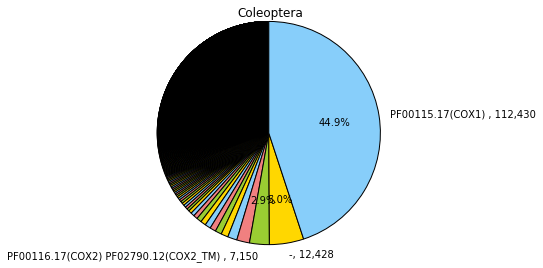

In [33]:
pfamd = {}
for i, line in enumerate(open(fn)):
    insect_order, insect_spe, pfams, cnt = line.strip().split('\t')
    if insect_order != 'Coleoptera':
        continue
    if not pfamd.has_key(pfams):
        pfamd.update({pfams:0})
    pfamd[pfams] += int(cnt)
draw_pie_chart("Coleoptera", pfamd)

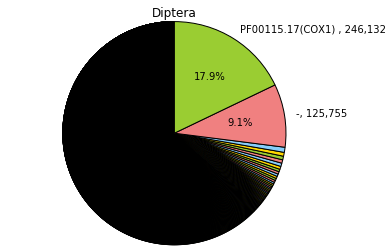

In [34]:
pfamd = {}
for i, line in enumerate(open(fn)):
    insect_order, insect_spe, pfams, cnt = line.strip().split('\t')
    if insect_order != 'Diptera':
        continue
    if not pfamd.has_key(pfams):
        pfamd.update({pfams:0})
    pfamd[pfams] += int(cnt)
draw_pie_chart("Diptera", pfamd)

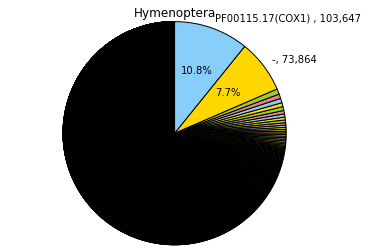

In [35]:
pfamd = {}
for i, line in enumerate(open(fn)):
    insect_order, insect_spe, pfams, cnt = line.strip().split('\t')
    if insect_order != 'Hymenoptera':
        continue
    if not pfamd.has_key(pfams):
        pfamd.update({pfams:0})
    pfamd[pfams] += int(cnt)
draw_pie_chart("Hymenoptera", pfamd)

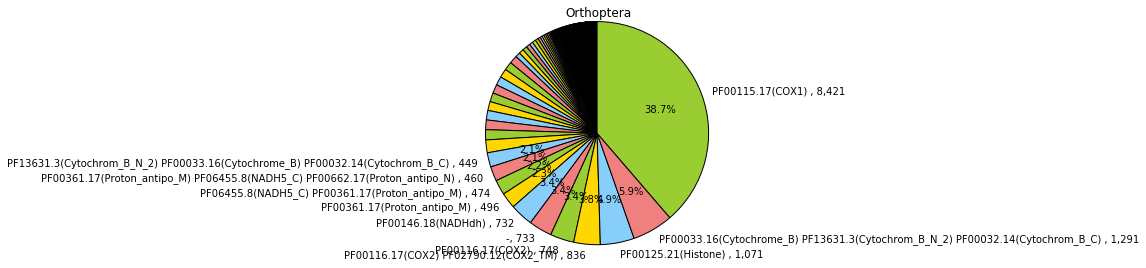

In [36]:
pfamd = {}
for i, line in enumerate(open(fn)):
    insect_order, insect_spe, pfams, cnt = line.strip().split('\t')
    if insect_order != 'Orthoptera':
        continue
    if not pfamd.has_key(pfams):
        pfamd.update({pfams:0})
    pfamd[pfams] += int(cnt)
draw_pie_chart("Orthoptera", pfamd)